# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
df = pd.read_csv('data/human_body_temperature.csv')

In [45]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [46]:
#first take a look at different features of data frame
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [47]:
df.groupby('gender').mean()

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


In [48]:
df.groupby('gender').count()

,temperature,heart_rate
gender,,
F,65,65
M,65,65


In [49]:
df.groupby('gender').std()

,temperature,heart_rate
gender,,
F,0.743488,8.105227
M,0.698756,5.875184


Text(0, 0.5, 'Frequency')

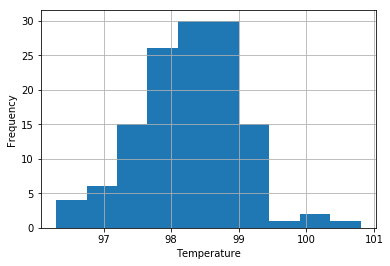

In [50]:
#plot histogram of temperature to see if visual display of normal distribution
df.temperature.hist()
plt.xlabel('Temperature')
plt.ylabel('Frequency')

In [51]:
#There are multiple tests we can look at to be certain that distribution is normal such as QQ Plot 
#and Shapiro Wilke test.  We will use scipy stats to determine if distribution is normal.
from scipy import stats

stats.normaltest(df.temperature)


NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

## 1.) Is the distribution of body temperatures normal?
## Since the p value is greater than .05, we can accept the null hypothesis and state that the difference between our distribution and a normal distribution is statistically similar with no significant difference.

## 2.) Is the sample size large? Are the observations independent?
## Since we just determined the distribution is normal and also know that the sample size > 30, the sample size is considered large. We can also assume the observations are independent since the data collected is not connected in any way.


In [52]:
#First try a bootstrap hypothesis test

bs_sample = np.random.choice(df['temperature'], size = 100)
bs_mean = np.mean(bs_sample)
bs_std = np.std(bs_sample)
bs_zse = bs_std / (100)**.5
bs_zsre = (bs_mean -98.6) / bs_zse
print(bs_mean,bs_std,bs_zse)
print(bs_zsre)

98.262 0.6848036214857508 0.06848036214857509
-4.935721561557584


#according to zscore table and bootstrap testing there is p value of 0 which indicates statistical significance and we reject the hypothesis 

In [53]:
#Now, let's try frequentist statistical testing. Since there is only one sample set,
#we will calculate the difference between the population mean and sample mean using 
#t test and also print the float value of the result up to 4 decimal places

sample = stats.ttest_1samp(df['temperature'], popmean=98.6)
print('t-statistic: %.4f , p-value: %.4f.' % sample)

t-statistic: -5.4548 , p-value: 0.0000.


## according to t statistics testing, the p value is zero indicating statistical significance and we reject null hypothesis

In [57]:
zstat = np.mean(df['temperature'])
zstd = np.std(df['temperature'])
zse = zstd / (130)**.5
zscre = (zstat - 98.6) / zse
print(zstat,zstd,zse)
print(zscre)

98.24923076923078 0.7303577789050377 0.06405661469519336
-5.475925202078116


## 3.) according to zscore table and zstatistic testing, there is a p value of 0 which indicates statistical significance and we reject the null hypothesis. This means there is a statistical difference between the mean of our data set and the 98.6 true population mean. The z score stats matched the value of the t testing however the t statistic is appropriate here since there is only one sample set.

In [59]:
## 4.)calculate t statistic but use a small sample size of 10.
bs_sample = np.random.choice(df['temperature'], size = 10)
bs_mean = np.mean(bs_sample)
bs_std = np.std(bs_sample)
bs_zse = bs_std / (10)**.5
bs_zsre = (bs_mean -98.6) / bs_zse
print(bs_mean,bs_std,bs_zse)
print(bs_zsre)

98.21000000000001 0.6284106937345972 0.198720909820783
-1.9625514011168173


In [60]:
# 4.)calculate t statistic but use a small sample size of 10.
sample = stats.ttest_1samp(bs_sample, popmean=98.6)
print('t-statistic: %.4f , p-value: %.4f.' % sample)

t-statistic: -1.8618 , p-value: 0.0955.


## 4)The z score statistics gives p value of .025 which is less than .05 and means we reject null hypothesis and signifies a statistical difference. The t score statistic gives p value of .095 which is greater than .05 and thus we would fail to reject hypothesis and indicates no statistical difference.  However since we know there is a difference from population mean and our sample set mean, in smaller set, z score test is preferred.  

In [63]:
#use margin of error and confidence interval to determine what temp is abnormal where abnormal is anything outside of 95% level of confidence
print(np.percentile(df['temperature'],[5,95]))

[97.045 99.3  ]


In [65]:
#for confidence interval within 95%, the z score or critical value would be 1.96
t = df['temperature']
se = t.std() / len(t) ** 0.5
marg = 1.96 * se
conv = (np.mean(t) - marg, np.mean(t) + marg)
print(conv)

(98.12319411222852, 98.37526742623304)

In [66]:
#print out the normal values for temperature
high = str(np.mean(t) + np.std(t))
low = str(np.mean(t) - np.std(t))
print('Normal Human Temps are between '+high+' and '+low+'.')

Normal Human Temps are between 98.97958854813581 and 97.51887299032575.


## 5)At what temperature should we consider someone's temperature to be "abnormal"? Therefore, since Normal Human Temps are between 98.97958854813581 and 97.51887299032575, anything outside of that range would be abnormal

In [68]:
#Use two sided hypothesis test and make mean male temp equal to mean female temp as null hypothesis and mean male temp not equal to mean female temp as alt hypoth.  
male = df[df.gender == 'M']['temperature']
female = df[df.gender == 'F']['temperature']

print('Male Mean: '+str(np.mean(male))+' , Female Mean: '+str(np.mean(female)))

Male Mean: 98.1046153846154 , Female Mean: 98.39384615384613


In [69]:
#now use t statistic to determine using p value if we should reject null hypothesis
gender_sample = stats.ttest_ind(male, female)
print('t-statistic: %.2f , p-value: %.5f.' % gender_sample)

t-statistic: -2.29 , p-value: 0.02393.


## 6)Is there difference between male anf female temp? Since p < .05, we would reject null hypothesis and therefore determine that there is a statistical difference between male and female temperature.


## Story: In this data analysis of body temps, we determined that our data set was of normal distribution with independently collected data but most likely was not employed in determining the mean population temp of 98.6 since there was a statistical difference between them.  We also determined that normal human temps fall between 98.97958854813581 and 97.51887299032575 and thus the population mean of 98.6 does indeed fall within our normal temp interval.  Lastly, we determined there is a statistical or significant difference between male and female temp.